In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from collections import Counter
import itertools

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
dataset_path = "../dataset/dataset.csv"
df = pd.read_csv(dataset_path)

In [31]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [32]:
df = df.drop_duplicates(subset="text")
df

,text,label
0,There are alot reasons to keep our the despise...,0
1,Driving smart cars that drive by themself has ...,0
2,"Dear Principal,\n\nI believe that students at ...",0
3,"Dear Principal,\n\nCommunity service should no...",0
4,My argument for the development of the driverl...,0
...,...,...
187218,Today's society is ever-evolving and the role ...,1
187219,The ever-evolving world of technology has chan...,1
187220,Fostering a Rescue Dog: Gaining Unconditional ...,1
187221,The importance of a solid foundation in educat...,1


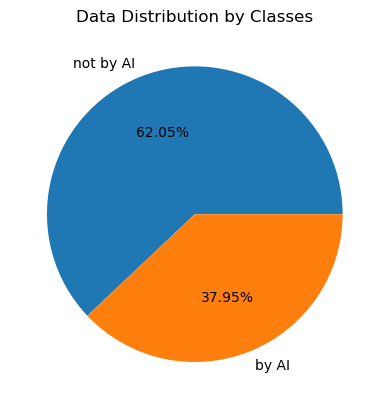

In [109]:
grouped_df = df[["text", "label"]].groupby(by="label")
class_count = grouped_df.count()
 
plt.pie(np.squeeze(class_count.values), labels=["not by AI", "by AI"], autopct='%1.2f%%')
plt.title("Data Distribution by Classes")

plt.show()

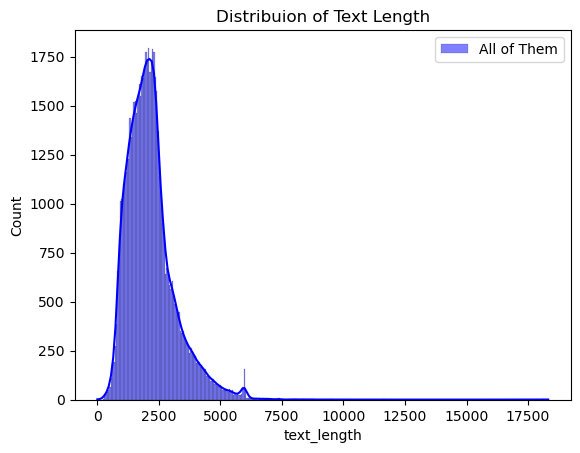

In [102]:
df['text_length'] = df['text'].apply(len)

sns.histplot(df['text_length'], color="blue", label='All of Them', kde=True)

plt.title("Distribuion of Text Length")
plt.legend()
plt.show()

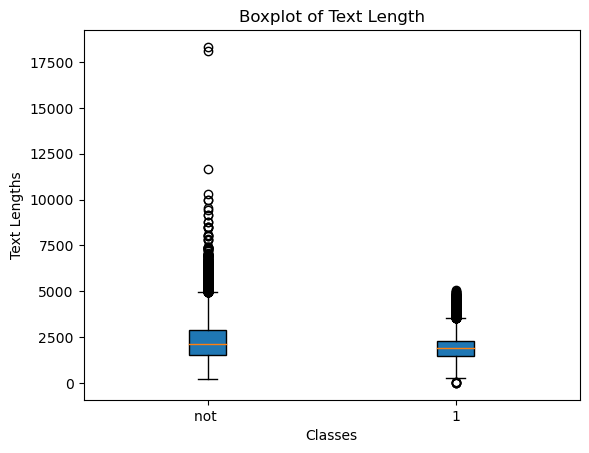

In [112]:
plt.boxplot([df[df["label"]==0]["text_length"], df[df["label"]==1]["text_length"]], vert=True, patch_artist=True, labels=["not ", "1"])

plt.xlabel("Classes")
plt.ylabel("Text Lengths")
plt.title('Boxplot of Text Length')
plt.show()

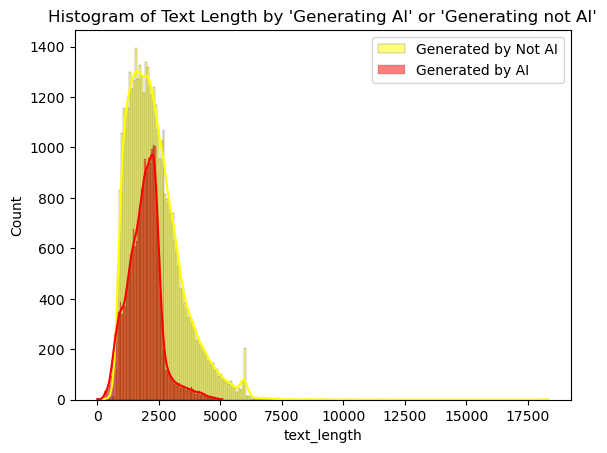

In [47]:
sns.histplot(df[df["label"]==0]['text_length'], color="yellow", label='Generated by Not AI', kde=True)
sns.histplot(df[df["label"]==1]['text_length'], color="red", label='Generated by AI', kde=True)

plt.title("Histogram of Text Length by 'Generating AI' or 'Generating not AI'")
plt.legend()
plt.show()

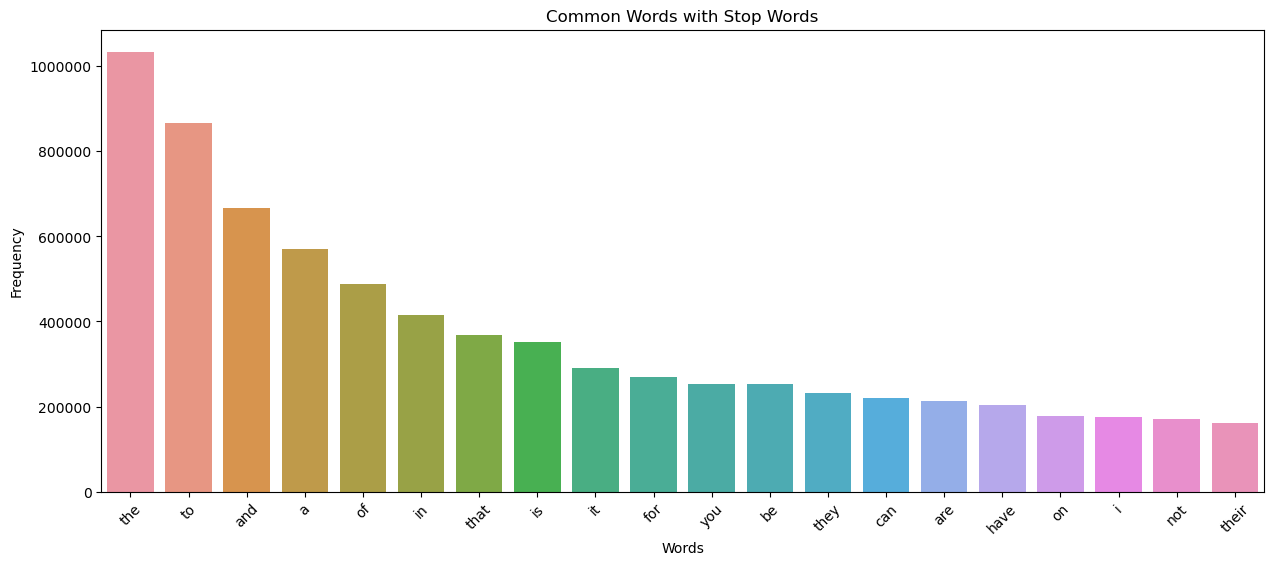

In [126]:
## Common Words with Stop Words

joined_text = " ".join(df["text"].values).lower()
words = joined_text.split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)

# Plot the most common words
plt.figure(figsize=(15, 6))
sns.barplot(x=[word for word, freq in common_words], y=[freq for word, freq in common_words])

plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title("Common Words with Stop Words")

plt.show()

## Preprocess

In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer():

    df["text"] = df["text"].replace(r"\n\n?", " ", regex=True) ## removes \n or \n\n
    df["text"] = df["text"].replace(r"[.|,]", " ", regex=True) ## removes \n or \n\n
    df["text"] = df["text"].apply(lambda each : each.lower())

    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df.iloc[:10]["text"].to_numpy())
    tfidf.get_feature_names_out()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.iloc[:10]["text"].to_numpy())
tfidf.get_feature_names_out()

array(['2012', '29', '43', '51', '61', '68', '92', '97', 'ability',
       'able', 'about', 'above', 'absolutely', 'abusing', 'accident',
       'accidents', 'account', 'achieve', 'activities', 'activity',
       'additionally', 'advantage', 'afraid', 'after', 'afterwards',
       'again', 'against', 'aid', 'alert', 'align', 'alike', 'all',
       'allow', 'allowed', 'almost', 'along', 'alot', 'already', 'also',
       'although', 'always', 'amateur', 'an', 'and', 'angry', 'another',
       'any', 'anytime', 'apart', 'appeal', 'applies', 'apportionment',
       'appropriate', 'are', 'area', 'aren', 'argument', 'around',
       'article', 'as', 'aslo', 'assisting', 'at', 'athletic',
       'atmosphere', 'attend', 'attending', 'attention', 'attitude',
       'author', 'automatic', 'automatically', 'automobiles',
       'automotive', 'autonomous', 'availables', 'average', 'avoids',
       'award', 'away', 'bad', 'balance', 'basis', 'be', 'beacuse',
       'beaucse', 'becasue', 'because', 

In [60]:
y = tfidf.transform(df.iloc[10:11]["text"].to_numpy())

In [61]:
y

<1x909 sparse matrix of type '<class 'numpy.float64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [34]:
df['tokenized_text'] = df.apply(lambda row: word_tokenize(row['text']), axis=1)


In [35]:
df.iloc[2]["tokenized_text"]

['Dear',
 'Principal',
 'I',
 'believe',
 'that',
 'students',
 'at',
 'school',
 'should',
 'not',
 'be',
 'allowed',
 'to',
 'have',
 'cell',
 'phones',
 'at',
 'school',
 'I',
 'have',
 'noticed',
 'that',
 'some',
 'female',
 'students',
 'carry',
 'around',
 'purses',
 'In',
 'class',
 'they',
 'may',
 'keep',
 'the',
 'purse',
 'next',
 'to',
 'them',
 'and',
 'silently',
 'text',
 'on',
 'their',
 'cell',
 'phone',
 'inside',
 'Other',
 'times',
 'phones',
 'may',
 'ring',
 'during',
 'class',
 'as',
 'kids',
 'intentionally',
 'have',
 'not',
 'shut',
 'off',
 'their',
 'phones',
 'This',
 'may',
 'sometimes',
 'be',
 'an',
 'accident',
 'as',
 'someone',
 'may',
 'be',
 'called',
 'when',
 'the',
 'phone',
 'in',
 'the',
 'students',
 'pocket',
 'has',
 'pushed',
 'against',
 'something',
 'as',
 'they',
 'sit',
 'down',
 'in',
 'a',
 'chair',
 'or',
 'stand',
 'against',
 'a',
 'wall',
 'The',
 'inexcusable',
 'thing',
 'is',
 'when',
 'a',
 'student',
 'is',
 'either',
 'pla